 # Analysis of Terrorist Activities Around The World

                                                by
                                             Diljeet Grewal

    According to a survey, about 218 million people are affected by calamities, natural and man-made, per annum and about 68000 people loose their lives every year. The frequency of natural disasters like earthquakes, volcanoes, etc have remained broadly constant, but the number of terrorist activities have grown over the period.
    
    The following is an exploratory data analysis of the Global Terrorism Database curated by START, the national consortium for the study of terrorism and responses to terrorism and the University of Maryland, College Park. This data contains over 180,000 terrorist attacks, and is considered “the most comprehensive unclassified database on terrorist events in the world".

## Content

Geography: Worldwide

Time period: 1970-2017, except 1993

Sources: Unclassified media articles (Note: Please interpret changes over time with caution. Global patterns are driven by diverse trends in particular regions, and data collection is influenced by fluctuations in access to media coverage over both time and place.)

Definition of terrorism:

"The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation."


In [1]:
#import number crunching libraries
import pandas as pd
import numpy as np

# import plottinb libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sb


# magic command to display graphics properly in the jupiter book.
%matplotlib inline

# to supress advisory warning regarding deprecation of some function etc. in future
import warnings
warnings.filterwarnings("ignore")

In [2]:
terror = pd.read_csv('globalterrorismdb_0718dist.csv' ,encoding='ISO-8859-1')

In [3]:
terror.shape

(181691, 135)

In [4]:
# data has large number of columns, let us have a look at all column names

for i in range(0,135):
    print(terror.columns[i], end = ", ")


eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

In [5]:
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
#rename columns to meaningful names
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

#make dataframe of relevant columns
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['casualities']=terror['Killed']+terror['Wounded']

In [7]:
terror.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [8]:
terror.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000,164817.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668,5.296128
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392,42.069023
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


In [9]:
terror.shape

(181691, 18)

###### Replace long name with a shorter one

In [10]:
terror.replace(to_replace = 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',value= 'Vehicle', inplace=True)

In [11]:
terror["Weapon_type"].value_counts()


Explosives            92426
Firearms              58524
Unknown               15157
Incendiary            11135
Melee                  3655
Chemical                321
Sabotage Equipment      141
Vehicle                 136
Other                   114
Biological               35
Fake Weapons             33
Radiological             14
Name: Weapon_type, dtype: int64

In [12]:
# top 10 countries by number of attacks
terror["Country"].value_counts().nlargest(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

In [13]:
# number of null values in columns of our interest
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64

##### It is seen from above that there are missing values in columns latitude, longitude

In [14]:
# drop records where no long lat is given, so that plotting will look proper
terror = terror.dropna(subset=['longitude','latitude'])
terror.shape

(177134, 18)

In [15]:
# find the city with highest number of attacks
print('City with Highest Terrorist Attacks:',terror['city'].value_counts().index[0])

#find the max number of people killed in any attack and its place
print('Maximum people killed in an attack are:',terror['Killed'].max(),'that took place in',terror.loc[terror['Killed'].idxmax()].city)

City with Highest Terrorist Attacks: Baghdad
Maximum people killed in an attack are: 1570.0 that took place in Tikrit


In [16]:
# top 10 countries by number of attacks
terror["Country"].value_counts().nlargest(10)

Iraq              24487
Pakistan          14318
Afghanistan       12639
India             11801
Colombia           7835
Philippines        6528
Peru               5808
United Kingdom     5227
El Salvador        4846
Turkey             4126
Name: Country, dtype: int64

## India is at number 4 of the worst affected countries where as Pakistan is at number 2 with about 40% more incidents of terror. 

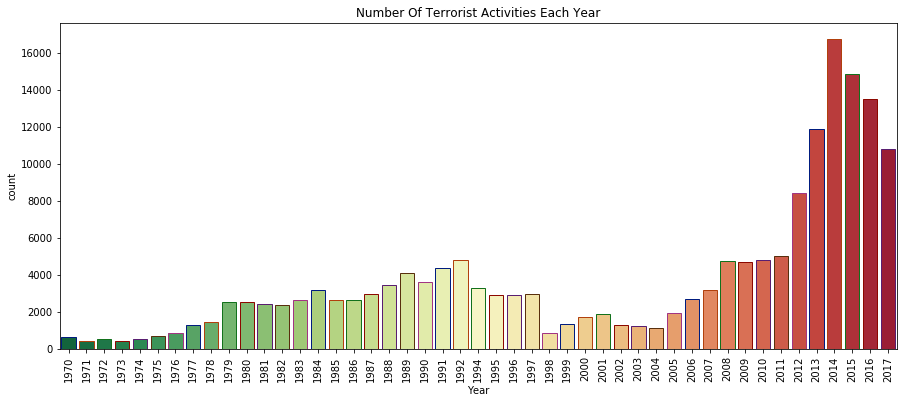

In [17]:
plt.subplots(figsize=(15,6))
sb.countplot('Year',data=terror,palette='RdYlGn_r',edgecolor=sb.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

#### It shows that terror attacks have risen sharply after 2011

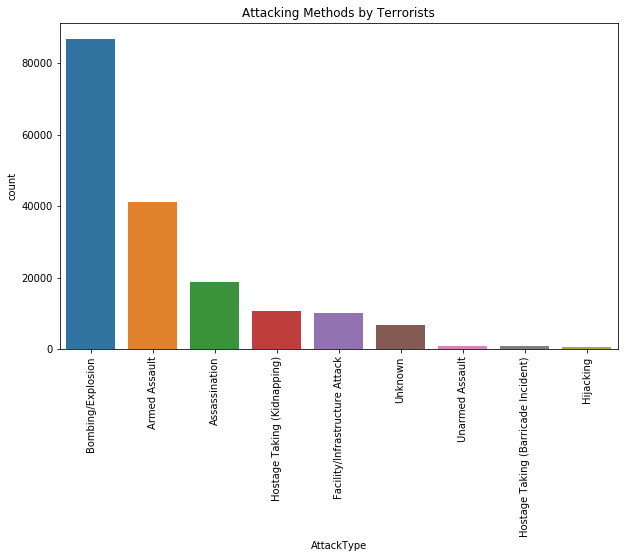

In [18]:
plt.subplots(figsize=(10,6))
sb.countplot('AttackType',data=terror,order=terror['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

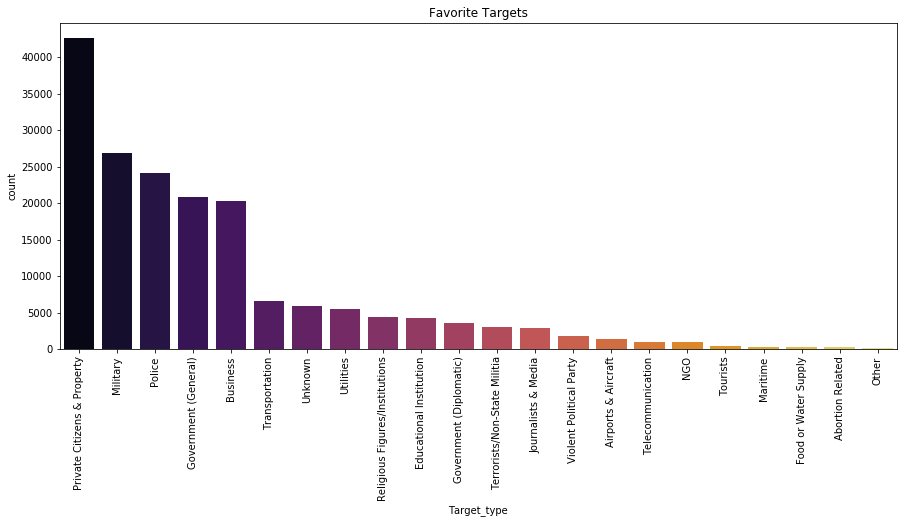

In [19]:
plt.subplots(figsize=(15,6))
sb.countplot(terror['Target_type'],palette='inferno',order=terror['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

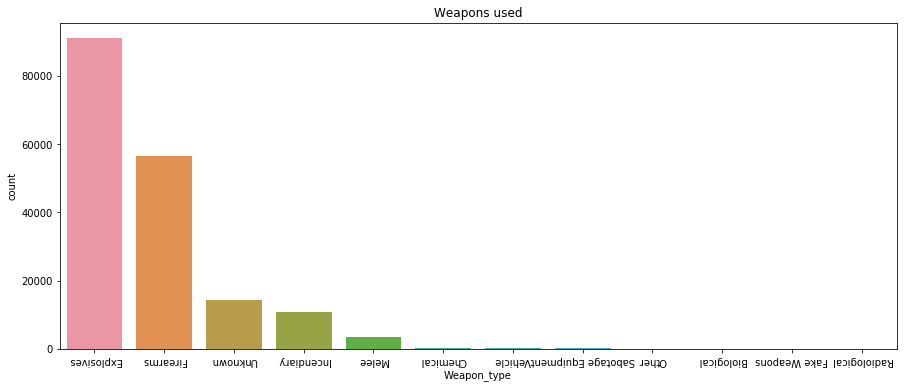

In [28]:
plt.subplots(figsize=(15,6))
sb.countplot(terror['Weapon_type'],order=terror['Weapon_type'].value_counts().index)
plt.xticks(rotation=180)
plt.title('Weapons used')
plt.show()

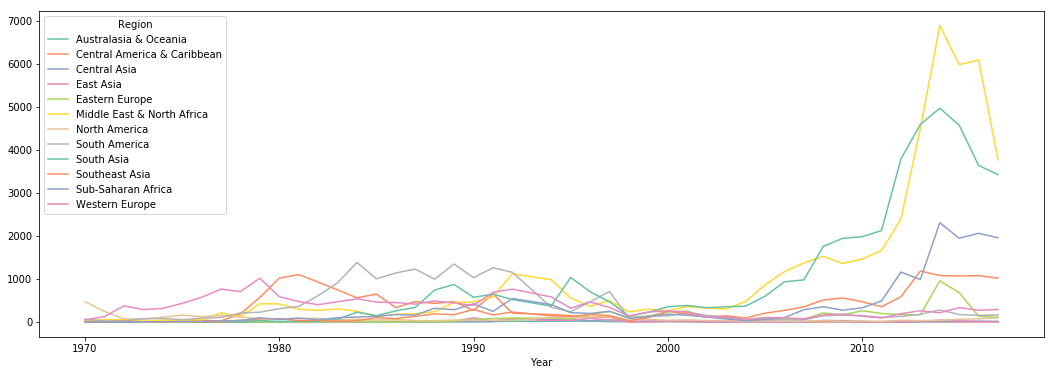

In [21]:
terror_region=pd.crosstab(terror.Year,terror.Region)
terror_region.plot(color=sb.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

# Let us talk about India

In [22]:
# lets talk about India
terror_india = terror.loc[terror['Country']=='India']
print('City in India with Highest Terrorist Attacks:',terror_india['city'].value_counts().index[0])
print('In India maximum people killed in an attack are:',terror_india['Killed'].max(),'that took place in',terror_india.loc[terror_india['Killed'].idxmax()].city)

City in India with Highest Terrorist Attacks: Srinagar
In India maximum people killed in an attack are: 188.0 that took place in Mumbai


In [23]:
# top 15 cities in India by number of attacks
terror_india["city"].value_counts().nlargest(15)

Srinagar            658
Unknown             602
Imphal              426
New Delhi           157
Amritsar            138
Sopore              102
Ludhiana             77
Guwahati             77
Anantnag             76
Jammu                57
Latehar district     55
Bijapur district     51
Sukma district       49
Darjeeling           47
Chandigarh           47
Name: city, dtype: int64

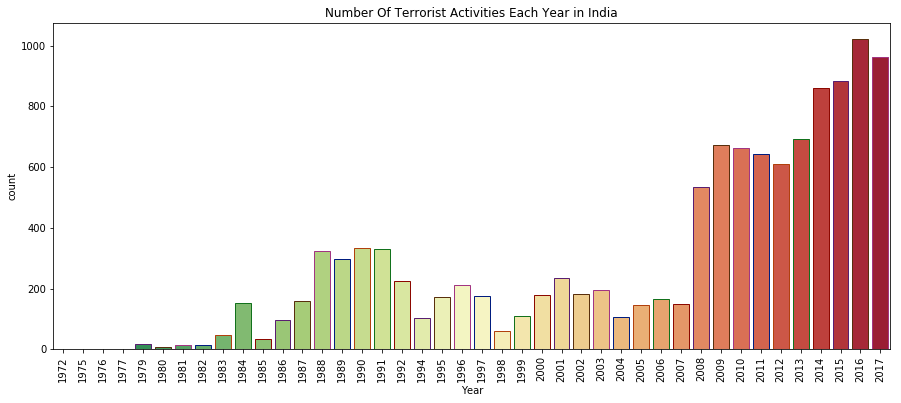

In [24]:
plt.subplots(figsize=(15,6))
sb.countplot('Year',data=terror_india,palette='RdYlGn_r',edgecolor=sb.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year in India')
plt.show()

## Significant jump in terror case is seen from 2008 onwards

''

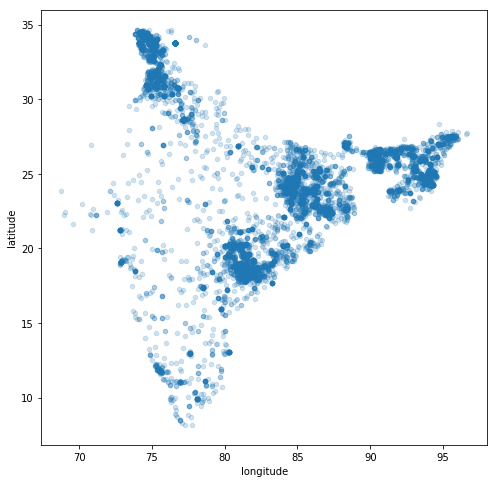

In [25]:
terror_india.plot(kind="scatter", x="longitude", y="latitude", figsize = (8,8),alpha=0.2)
;

## From the above plot a startling fact emerges that majority of the terror cases in India are concentrated in the Eastern region, which is far from the impession one gathers from print  and electronic media coverage.

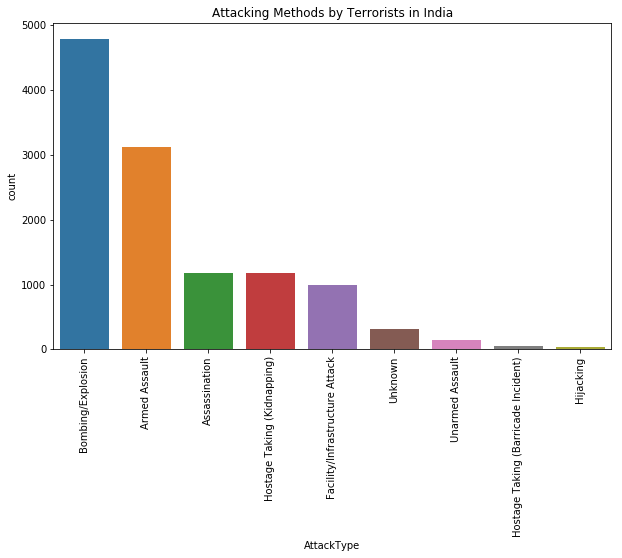

In [26]:
plt.subplots(figsize=(10,6))
sb.countplot('AttackType',data=terror_india,order=terror['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists in India')
plt.show()

In [27]:
# top 10 Attack types in India 
terror_india["AttackType"].value_counts().nlargest(10)

Bombing/Explosion                      4793
Armed Assault                          3121
Assassination                          1184
Hostage Taking (Kidnapping)            1177
Facility/Infrastructure Attack          991
Unknown                                 307
Unarmed Assault                         143
Hostage Taking (Barricade Incident)      44
Hijacking                                41
Name: AttackType, dtype: int64

## References

2. E-Books
4. Tutorial point, Machine Learning with Python
5. Youtube